In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Position_Salaries.csv")
df.head(5)
# mormally aisa dataset humy offices me dekhny ko milta hy.
# q k jese he level increase hota hy to salary  barh jati hy.

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


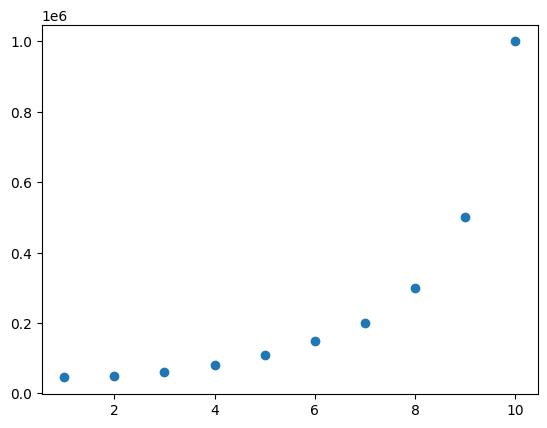

In [131]:
plt.scatter(df["Level"], df["Salary"])
plt.show()

### Polynomial Regression:

The relationship between the independent variable (X) and the dependent variable (Y) is modeled 
as an nth degree polynomial. 

y= b0+b1x1+ b2x12+ b2x13+...... bnx1n

In [132]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [134]:
#df.shape
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

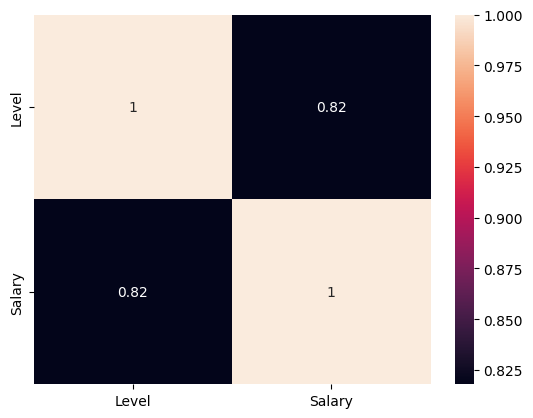

In [135]:
# Convert non-numeric values to NaN (Not a Number)

#df_numeric = df.apply(pd.to_numeric, errors='coerce')
            # df_numeric
sns.heatmap(df[['Level', 'Salary']].corr(),annot=True)   # ab q k position is categorical data hy to is ka correlation nahi
                                    # nikal skty(error ae ga). To phir 2 option hyn. 
                                    # first:
                                    #    ya to is columns ki values ko null (NAN) kr k chaly ya phr 
                                    #    sirf 2 he columns ka heatmap bana ly. df[['Level', 'Salary']].corr()
                                    # second:
                                    #    bcz position hmary lye zrori bhi ho sakti hy. q k hum  janty hyn
                                    #    k jitna position achi ho gi. salary bhi ziyada hoti hy
                                    #    to phr hum categorical data ko number ki form me lana ho ga.
                                    #    sab se hight post ko 1 or phr 2 , 3 etc.
                                    #    or phr heatmap banaya ja skta hy.

plt.show()

# df[['Level', 'Salary']].corr()

In [ ]:
# example of second case

# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample DataFrame with non-numeric data
# data = {
#     'Position': [1, 2, 3, 4],       # 'Business Analyst', 'Manager', 'Director', 'Executive'
#     'Level': [1, 2, 3, 4],
#     'Salary': [50000, 80000, 120000, 150000]
# }

# ds = pd.DataFrame(data)

# # Convert non-numeric values to NaN (Not a Number)
# df_numeric = df.apply(pd.to_numeric, errors='coerce')

# # Create heatmap with numeric data
# plt.figure(figsize=(8, 6))
# sns.heatmap(ds.corr(), annot=True)
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
#df_numeric.corr()
df = df.values  # converting dataframe to 2D

In [136]:
x = df[["Level"]]
y = df["Salary"]

In [73]:
type(x)

numpy.ndarray

In [69]:

from sklearn.preprocessing import PolynomialFeatures

In [137]:
pf = PolynomialFeatures(degree=3)
x = pf.fit_transform(x)

In [74]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression

In [139]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [104]:
lr.score(x_test, y_test)*100

99.45736852600312

In [140]:
pred = lr.predict(x)

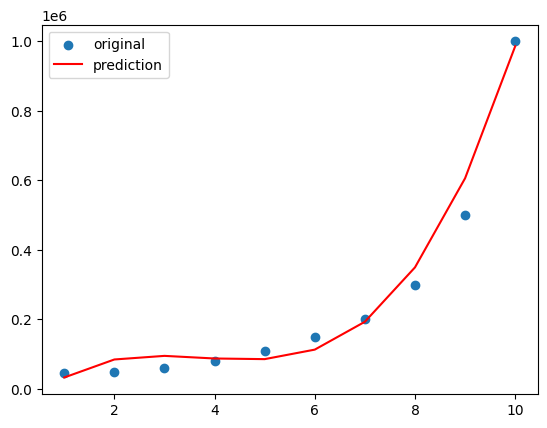

In [141]:
plt.scatter(df["Level"], df["Salary"])
plt.plot(df["Level"],pred, c='red')
plt.legend(['original','prediction'])
plt.show()

In [108]:
lr.coef_

array([-2.88198787e-05,  1.14889431e-09,  4.56802723e+04, -1.72662521e+04,
        1.94631866e-10,  4.56802723e+04, -1.72662521e+04, -1.72662521e+04,
        8.36974250e+03, -1.09286045e+03,  0.00000000e+00,  4.56802723e+04,
       -1.72662521e+04, -1.72662521e+04,  8.36974250e+03, -1.09286045e+03,
        8.36974250e+03, -1.09286045e+03,  1.74551227e+02, -1.48809524e+00])

In [109]:
lr.intercept_

-27718.373465108336

In [142]:
x = [[4]]
#pf.fit(x)
test = pf.transform(x)
#lr.predict(4)

#pf = PolynomialFeatures(degree=3)
pf.fit(x)
x = pf.transform(x)

c:\Users\Aahil Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [143]:
lr.predict(test)

array([87774.11365134])